<a href="https://colab.research.google.com/github/snoop2head/ml_classification_tutorial/blob/main/ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# clone repository from the github
!git clone https://github.com/snoop2head/ml_classification_tutorial

Cloning into 'ml_classification_tutorial'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 23 (delta 6), reused 23 (delta 6), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [6]:
# update repository when change is made
!git pull

Already up to date.


In [7]:
# change directory to the clone repository
%cd ml_classification_tutorial/

/content/ml_classification_tutorial/ml_classification_tutorial


In [8]:
import pandas as pd
import numpy as np

### Description
Pitch, Roll, Yaw는 고개의 회전 축을 세 개로 쪼개놓은 것이다.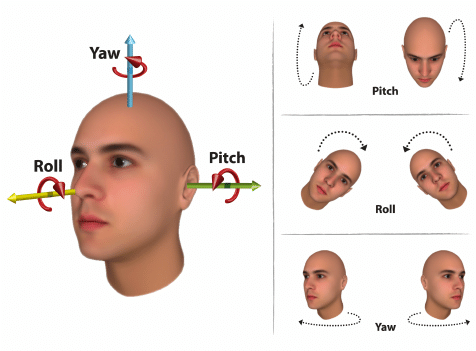

In [9]:
# read csv data from the cloned data
df_bad = pd.read_csv("./data/df_bad.csv", index_col=0) # set first column as index
df_good = pd.read_csv("./data/df_good.csv", index_col=0) # set first column as index

In [10]:
# designate labels for the dataset
df_good["label"] = 0
df_bad["label"] = 1

In [11]:
df_bad.head(3)

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
1,94,124,0.846603,-2.589851,-2.215973,0.846031,1
2,96,123,0.846122,-2.837860,-0.927490,0.826792,1
3,92,121,0.817107,-2.599693,-2.786713,0.877005,1


In [12]:
df_good.head(3)

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
1,89,120,0.989072,-0.577896,-1.580688,0.638711,0
2,105,119,0.941441,-2.540039,-0.858757,0.614961,0
3,89,120,0.968118,-0.905693,-1.525284,0.666339,0


In [13]:
# 좋은 자세 데이터값과 나쁜 자세 데이터값을 한 개의 데이터프레임으로 합친다
df = pd.concat([df_bad, df_good])
df.sample(4)

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
189,234,219,0.824488,-12.875633,2.324890,0.743652,0
177,280,273,0.871183,-10.697147,-0.517517,1.323010,1
112,85,105,0.828753,-0.574722,-2.930893,0.857552,0
33,94,124,0.865523,-1.642029,-3.273911,0.862973,1


In [14]:
# Width, Height은 얼굴 크기
# Eye2Box는 눈 사이의 거리
# Roll, Yaw, Pitch는 고개의 회전
# label은 
list(df.columns)

['Width', 'Height', 'Eye2Box', 'Roll', 'Yaw', 'Pitch', 'label']

In [15]:
# 얼굴의 크기(Width, Height), Pitch가 자세(label)과 유의미한 상관관계가 있음을 보여준다.
df.corr()

,Width,Height,Eye2Box,Roll,Yaw,Pitch,label
Width,1.000000,0.844207,-0.004413,-0.544154,0.025867,0.413702,0.254726
Height,0.844207,1.000000,-0.007628,-0.301882,0.091593,0.437010,0.387298
Eye2Box,-0.004413,-0.007628,1.000000,0.003241,-0.092577,0.014275,-0.030104
Roll,-0.544154,-0.301882,0.003241,1.000000,0.011580,-0.292431,-0.135549
Yaw,0.025867,0.091593,-0.092577,0.011580,1.000000,0.049483,0.183638
Pitch,0.413702,0.437010,0.014275,-0.292431,0.049483,1.000000,0.393617
label,0.254726,0.387298,-0.030104,-0.135549,0.183638,0.393617,1.000000


### Random Forest

In [16]:
y = df["label"] # y는 대개 우리가 라벨, 지표들이다.
X = df.drop(['label'], axis = 1) # x는 분류에 필요한 데이터들이다.

In [17]:
y.head()

1    1
2    1
3    1
4    1
5    1
Name: label, dtype: int64

In [18]:
X.columns

Index(['Width', 'Height', 'Eye2Box', 'Roll', 'Yaw', 'Pitch'], dtype='object')

In [19]:
# training dataset, test dataset을 분리함
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [20]:
# Random Forest classifier을 사용해서 분류 모델을 생성한다.
# Classifier 안에 들어가는 arguments는 나중에 다시 설명할게요.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
accuracy = model.score(X_test, y_test)
accuracy

0.9141104294478528

### Saving and Loading Model

In [22]:
# save model file to the path
from joblib import dump, load
accuracy = str(accuracy)
file_name = f"./models/model{accuracy[:5]}"
MODEL_PATH = f"{file_name}.joblib"
dump(model, MODEL_PATH) 

['./models/model0.914.joblib']

In [23]:
# load model from the path
model_loaded = load(MODEL_PATH) 

In [24]:
# predict from created model (earlier)
y_predicted = model.predict(X_test)

In [25]:
# predict from loaded model
y_predicted_loaded = model_loaded.predict(X_test)

In [26]:
# check whether loaded model yields same result as created model
y_predicted == y_predicted_loaded

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### Using Confusion Matrix to check accuracy

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[77,  9],
       [ 5, 72]])

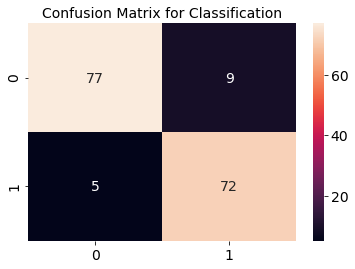

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

# font size setting
SMALL_SIZE = 14
MEDIUM_SIZE = 14.5
LARGE_SIZE = 15.5

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# figure description
title_text = f"Confusion Matrix for Classification"
plt.title(label=title_text) # title
plt.xlabel('Predicted') # y axis label
plt.ylabel('Truth') # x axis label

# heatmap annotation for color
sn.heatmap(cm, annot=True)


### Hyperparameter Tuning
[Random Forest Hyperparameter Tuning](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [30]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
rf_random.best_params_